# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [32]:
# Q1 (code)
!pip install tomotopy

In [33]:
!pip install little_mallet_wrapper

In [34]:
import tomotopy as tp #for topic modeling
import little_mallet_wrapper #for text processing
import seaborn #for data visualization
import glob #for searching files in the file system
from pathlib import Path #for processing file paths
import pandas as pd #for data processing and analysis
import re #for preprocessing text data

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [35]:
# Q2 (code)
import pandas as pd

# Load the datasets for Sanders and Trump's tweets
sanders_tweets = pd.read_csv("sanders_tweets.csv")
trump_tweets = pd.read_csv("trump_tweets.csv")

# Concatenate the datasets into a single dataframe
combined_tweets = pd.concat([sanders_tweets, trump_tweets])

# Display the combined dataframe as a table
display(combined_tweets.head())

,Username,TweetId,Title,Content
0,SenSanders,1351670845639421952,SenSanders_1351670845639421952,Wealth increase in past 10 months:\n⬆️$173 bil...
1,SenSanders,1351259762722279424,SenSanders_1351259762722279424,Amidst massive income and wealth inequality te...
2,SenSanders,1351242822293319680,SenSanders_1351242822293319680,"“We now have the resources, we now have the sk..."
3,SenSanders,1350885541911400448,SenSanders_1350885541911400448,"After surviving an attempt on his life, Russia..."
4,SenSanders,1349880150041780224,SenSanders_1349880150041780224,President-Elect Biden's COVID rescue plan will...


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [ ]:
# Q3 (code)

#Tip: add the following line to remove URLS and user mentions processed_text = re.sub(r"http\S+|www\S+|https\S+|//t|co/|@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE)

In [36]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Initialize lists
training_data = []
original_texts = []
titles = []

# Define stopwords and compile regex for punctuation and numbers
stop_words = set(stopwords.words('english')) # Initialize a set of English stopwords

# Iterate through each row of the combined dataset
for index, row in combined_tweets.iterrows():
    original_text = row['Content'].lower() # Extract original text and convert it to lowercase
    original_texts.append(original_text) # Append original text to the list
    
    # Remove URLs, user mentions, and specific keywords using regular expressions
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump|rt", '', original_text, flags=re.MULTILINE)
    words = word_tokenize(processed_text) # Tokenize the processed text into words
    
    # Filter out stopwords and non-alphabetic characters using list comprehension
    words_filtered = [word for word in words if word not in stop_words and word.isalpha()]

    training_data.append(' '.join(words_filtered))
    # Combine the username and tweet ID and append it as a title to the titles list
    titles.append(f"{row['Username']} - {row['TweetId']}")

training_data[0]# Output the first processed text for checking the result

[nltk_data] Downloading package punkt to /Users/mykilee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mykilee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'wealth increase past months billion elon musk billion jeff bezos billion walton family billion bill gates billion mark zuckerberg increase minimum wage must tax rich amp raise minimum wage least'

In [37]:
#Check the length of the three lists. Ensure that there are no errors or omissions in data processing.

len(training_data), len(original_texts), len(titles)

(30371, 30371, 30371)

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [43]:
# Q4 (code)
# Number of topics to return
num_topics = 10
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')



Topic Model Training...


Iteration: 0	Log-likelihood: -9.112269952360993
Iteration: 10	Log-likelihood: -8.759281171276129
Iteration: 20	Log-likelihood: -8.59646518750114
Iteration: 30	Log-likelihood: -8.507938626819543
Iteration: 40	Log-likelihood: -8.457555257470174
Iteration: 50	Log-likelihood: -8.419720318605593
Iteration: 60	Log-likelihood: -8.394479852647368
Iteration: 70	Log-likelihood: -8.373181074096147
Iteration: 80	Log-likelihood: -8.362903815547073
Iteration: 90	Log-likelihood: -8.346183206023358


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [44]:
# Q5a (code)
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

border must people amp war country states security trump democrats

✨Topic 1✨

health care people tax must million americans need trump billion

✨Topic 2✨

trump fbi russia collusion amp witch mueller hunt campaign obama

✨Topic 3✨

people american must country america us stand workers americans every

✨Topic 4✨

democrats president impeachment senate house trump vote cou election republicans

✨Topic 5✨

news fake biden media joe amp people would even like

✨Topic 6✨

president trump jobs economy amp american since ever years history

✨Topic 7✨

president great thank today united house white trump states live

✨Topic 8✨

great thank vote state big amp total endorsement maga get

✨Topic 9✨

china great amp many big trade much deal years new



#Q5b (words)
Describe what each topic is about. What ideas, values, or situations do these keywords refer to?

Topic 0: This topic appears to be about national security and immigration issues, mentioning border, war, country, security, and Trump.

Topic 1: This topic seems to revolve around healthcare and taxation, discussing health care, tax, million, Americans, and Trump.

Topic 2: This topic focuses on controversies and investigations surrounding Trump, mentioning FBI, Russia collusion, Mueller, campaign, and Obama.

Topic 3: This topic emphasizes American identity and patriotism, mentioning people, American, country, America, workers, and stand.

Topic 4: This topic discusses political dynamics and events involving Democrats and Republicans, including impeachment, Senate, House, Trump, and elections.

Topic 5: This topic seems to address skepticism towards mainstream media, mentioning fake news, Biden, media, people, and skepticism.

Topic 6: This topic highlights achievements and challenges related to the economy under Trump's presidency, mentioning jobs, economy, American, and years.

Topic 7: This topic expresses gratitude towards Trump's presidency and achievements, mentioning president, thank, today, United States, and White House.

Topic 8: This topic appears to be about political support and endorsement for Trump, mentioning vote, state, big, total, endorsement, and MAGA (Make America Great Again).

Topic 9: This topic discusses trade relations with China and economic deals, mentioning China, trade, deal, and years.

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [45]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5354121483489871 
Per Topic: [0.3935145653784275, 0.6082590535283089, 0.7198701143264771, 0.5634742200374603, 0.5108054101467132, 0.5515919540077447, 0.4702320143580437, 0.4318609893321991, 0.5605794876813889, 0.5439336746931076]



Let's change the number of topics to 15.

In [46]:
# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())


# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)

In [47]:
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5442017552256584 
Per Topic: [0.4813942819833755, 0.5394670020788908, 0.5609084367752075, 0.5949072405695915, 0.7310479402542114, 0.6021157242357731, 0.6000274956226349, 0.571214734017849, 0.43859811723232267, 0.49268235862255094, 0.3915898233652115, 0.5153531700372695, 0.5044494703412056, 0.3854647379368544, 0.7538057953119278]



Let's change the number of topics to 20.

In [50]:
# Number of topics to return
num_topics = 20
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())


# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)

In [51]:
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5746120059117675 
Per Topic: [0.5313095554709435, 0.5993647307157517, 0.5232164919376373, 0.7113989278674125, 0.5764276534318924, 0.5983426421880722, 0.49809261336922644, 0.5435788124799729, 0.7365872502326966, 0.6077478870749473, 0.509277705848217, 0.5201259031891823, 0.5479015365242959, 0.5795010060071946, 0.5062540233135223, 0.6148401141166687, 0.5129919320344924, 0.625440490245819, 0.4599680110812187, 0.6898728311061859]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

Q6

I trained the model with 10 topics at first, and the coherence score obtained was an average of 0.535. 

I made changes to 15 topics. This adjustment resulted in a slightly improved coherence score, with an average of 0.544.

I further modified the number of topics and trained the model with 20 topics. This change led to a continued increase in coherence, with the average coherence score reaching 0.575.

Therefore, as the number of topics within the model expands, the correlation or coherence among words within those topics also grows. This enhancement is observed as the number of topics transitions from 10 to 15 and then from 15 to 20, both instances resulting in an improved coherence score. 

From these outcomes, it can be inferred that as the number of topics rises, the model becomes more proficient in identifying connections among topics within the dataset.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

In [ ]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model

Number of Topics: 2, Coherence Score: 0.3072137087583542
Number of Topics: 4, Coherence Score: 0.5042773263528942
Number of Topics: 6, Coherence Score: 0.4864501076440016
Number of Topics: 8, Coherence Score: 0.5136575685814022
Number of Topics: 10, Coherence Score: 0.5333664627373218
Number of Topics: 12, Coherence Score: 0.5597743484502037
Number of Topics: 14, Coherence Score: 0.5294545549766293
Number of Topics: 16, Coherence Score: 0.5378286442253737
Number of Topics: 18, Coherence Score: 0.5614360122630994
Number of Topics: 20, Coherence Score: 0.5728233203105628
Number of Topics: 22, Coherence Score: 0.5669233090667563
Number of Topics: 24, Coherence Score: 0.5736986830520131
Number of Topics: 26, Coherence Score: 0.5748878897024462
Number of Topics: 28, Coherence Score: 0.5640451574964183
Number of Topics: 30, Coherence Score: 0.5877809324736398


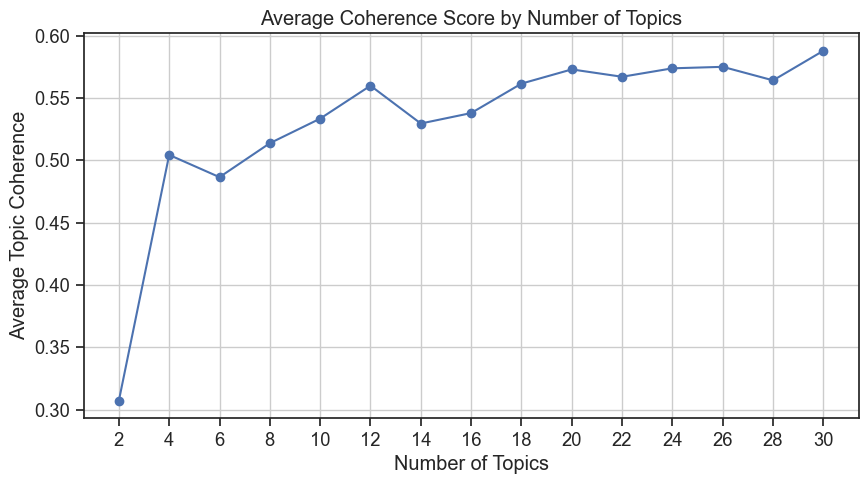

In [53]:
import matplotlib.pyplot as plt
import tomotopy as tp

def calculate_coherence_scores(training_data, start, end, step, iterations=100, train_step=10):
    coherence_scores = {}

    for k in range(start, end + 1, step):
        model = tp.LDAModel(k=k)

        for text in training_data:
            model.add_doc(words=text.split())

        for i in range(0, iterations, train_step):
            model.train(train_step)

        coh = tp.coherence.Coherence(model, coherence='c_v')
        average_coherence = coh.get_score()
        coherence_scores[k] = average_coherence
        print(f"Number of Topics: {k}, Coherence Score: {average_coherence}")

    return coherence_scores

def plot_coherence_scores(coherence_scores):
    plt.figure(figsize=(10, 5))
    plt.plot(list(coherence_scores.keys()), list(coherence_scores.values()), marker='o')
    plt.title('Average Coherence Score by Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Topic Coherence')
    plt.xticks(list(coherence_scores.keys()))
    plt.grid(True)
    plt.show()

coherence_scores = calculate_coherence_scores(training_data, start=2, end=30, step=2)
plot_coherence_scores(coherence_scores)

When I increased the number of topics from 20 to 30, we observed an increase in coherence score from 0.5728 to 0.5878, indicating that increasing the number of topics helps improve the model's coherence.

From the results, we can infer that as the number of topics increases, the model becomes better at capturing the underlying semantic structure in the text data, and the correlation between topics is better expressed. This can explain why the coherence score increases with the increase in the number of topics.

However, it should also be noted that with the increase in the number of topics, the complexity of the model also increases, which may lead to overfitting or topics that are difficult to interpret. Therefore, when choosing the final number of topics, it is necessary to strike a balance between the coherence and interpretability of the model.

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [55]:
# Q7a (code)
#Create two empty lists to store topic keywords and word lists in the topic
topics = []
topic_individual_words = []

#Traverse each topic and obtain the keywords of the topic
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words) #Add topic keywords to the topics list
#Keyword splitting and adding the word list to the topic_individual_words list    
    topic_individual_words.append(topic_words.split()) 

    #Get the distribution of each document across all topics
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]


In [56]:
#See how document 30 is distributed across topics
topic_distributions[29]

[0.005140653,
 0.004424251,
 0.0036576476,
 0.004465073,
 0.045887187,
 0.21299906,
 0.003263364,
 0.005043392,
 0.0029093393,
 0.0077018496,
 0.0031435878,
 0.08619319,
 0.38022232,
 0.0037807005,
 0.0035790496,
 0.17046173,
 0.0042238683,
 0.0037264032,
 0.047289856,
 0.0018875045]

In [58]:
from IPython.display import Markdown, display
import re

#Convert this string to Markdown format using the Markdown and display functions
def make_md(string):
    display(Markdown(str(string)))

#Find the top 5 documents for a specific topic in the topic distribution and display their topic words in bold
def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return
# Find the top 5 documents in the topic 2 in the topic distribution
get_top_docs(titles, topic_distributions, topic_index=2, n=5)


### ✨Topic 2✨

jobs economy ever president record history trump best years since



---


✨  
**Topic Probability**: 0.9569263458251953  
**Document**: @realDonaldTrump - 1064540462848098304



✨  
**Topic Probability**: 0.938852846622467  
**Document**: SenSanders - 1143980626267320320



✨  
**Topic Probability**: 0.9383921027183533  
**Document**: SenSanders - 1152580921368780800



✨  
**Topic Probability**: 0.9341898560523987  
**Document**: SenSanders - 1166818676508520448



✨  
**Topic Probability**: 0.9322972297668457  
**Document**: @realDonaldTrump - 1181644113092980737



In [59]:
get_top_docs(titles, topic_distributions, topic_index=3, n=5)

### ✨Topic 3✨

fbi russia trump amp collusion witch mueller hunt campaign hillary



---


✨  
**Topic Probability**: 0.9431477785110474  
**Document**: @realDonaldTrump - 1086291782202257408



✨  
**Topic Probability**: 0.9305056929588318  
**Document**: @realDonaldTrump - 1027214330503352320



✨  
**Topic Probability**: 0.9278309941291809  
**Document**: @realDonaldTrump - 1104014775904804864



✨  
**Topic Probability**: 0.9278309941291809  
**Document**: @realDonaldTrump - 1103154015175626752



✨  
**Topic Probability**: 0.9278309941291809  
**Document**: @realDonaldTrump - 1075210869007622144



In [60]:
get_top_docs(titles, topic_distributions, topic_index=4, n=5)

### ✨Topic 4✨

china states united much dollars money many would amp countries



---


✨  
**Topic Probability**: 0.9302608370780945  
**Document**: @realDonaldTrump - 1131243665685397506



✨  
**Topic Probability**: 0.9246777296066284  
**Document**: @realDonaldTrump - 1123532045626630144



✨  
**Topic Probability**: 0.8890888094902039  
**Document**: @realDonaldTrump - 1123531974751203328



✨  
**Topic Probability**: 0.8846492171287537  
**Document**: @realDonaldTrump - 1123573705697894400



✨  
**Topic Probability**: 0.8822616338729858  
**Document**: @realDonaldTrump - 1317134161308733440



In [61]:
get_top_docs(titles, topic_distributions, topic_index=5, n=5)

### ✨Topic 5✨

impeachment president democrats house senate cou schiff call supreme trump



---


✨  
**Topic Probability**: 0.9184583425521851  
**Document**: @realDonaldTrump - 1191203537356804097



✨  
**Topic Probability**: 0.9147489070892334  
**Document**: SenSanders - 1309141790641934336



✨  
**Topic Probability**: 0.9147489070892334  
**Document**: @realDonaldTrump - 1041622600403898368



✨  
**Topic Probability**: 0.9106858372688293  
**Document**: @realDonaldTrump - 1220909631184175109



✨  
**Topic Probability**: 0.8934850692749023  
**Document**: @realDonaldTrump - 1210551775608164353



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

In [ ]:
#Q7b (words)


In Topic 3 and Topic 4, the first few tweets only come from the DonaldTrump's account, while in Topic 2 and Topic 5, most of the first few tweets come from the account SenSanders. 

Topics 3 and 4 cover topics such as FBI, Russia, China, the United States, currency, etc. 
Although there are also some tweets posted by SenSanders, the tweets with higher topic probabilities mainly come from Trump. 
This indicates that these topics are more representative because they reflect Trump's views and positions on specific issues, 
and due to his higher activity on social media, these topics are more prominent in the model.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [64]:
# Crete a sample of tweets

from random import sample

target_labels = sample(titles,100)

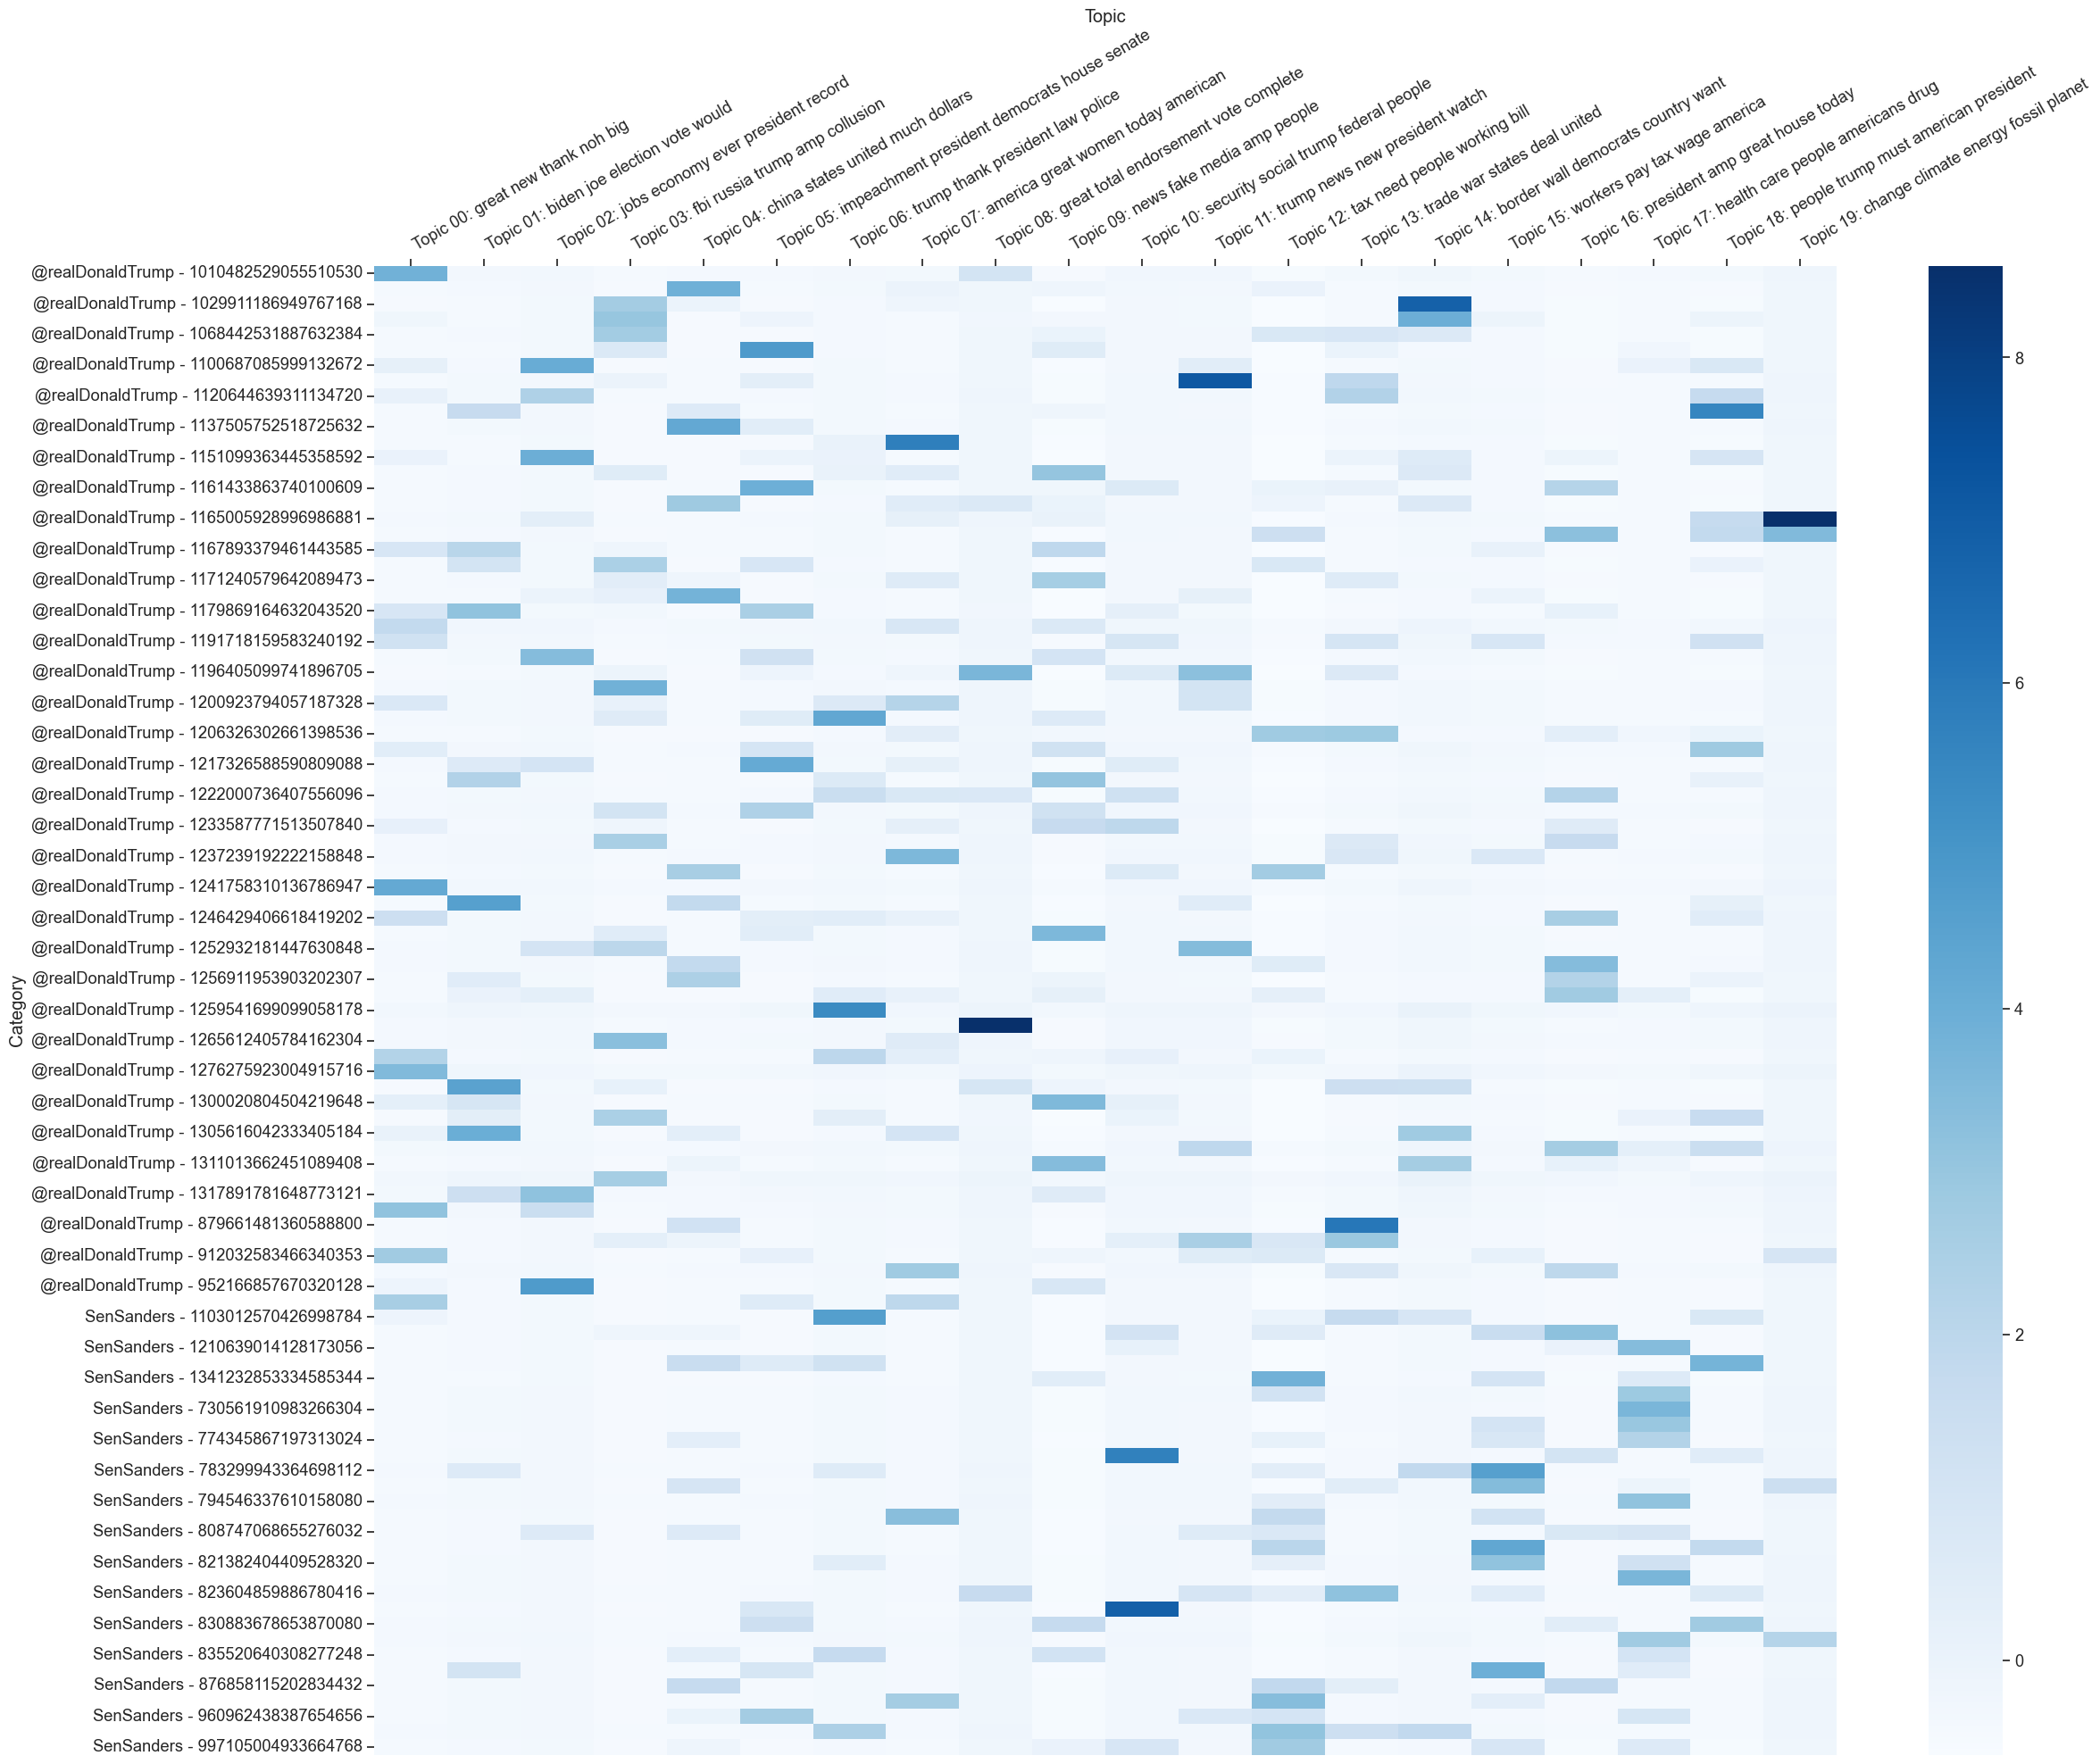

In [65]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=25):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()
    
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(25,20))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

In [ ]:
# Q9 (words)

In this heatmap, darker squares represent higher probabilities for the corresponding topics (compared to other positions in the heatmap), while lighter squares represent lower probabilities for the corresponding topics. Each row in this heatmap represents a politician, each column represents a topic, and the color intensity of each cell indicates the probability of that topic for the corresponding politician. 

By observing the entire table, we find that topic 12, topic 15, and topic 17 have more darker squares appearing below, corresponding to the documents of Sanders. The keywords of these topics involve tax，bill, working, health care, people, and worker. 

More darker squares appear above the columns corresponding to topic 03 and topic 09, corresponding to Trump's documents. The keywords in these topics include great, fake news, and media. Through observation, we can find that in topic 08, there is a darker block, corresponding to Trump's tweets, and this topic involves the overall evaluation and support of political campaigns or activities, possibly discussing the election activities of political figures or candidates, emphasizing support, voter behavior, and activity completion, related to Trump's participation in the presidential election.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [66]:
# X2 (code)
import random 
from collections import defaultdict

#Create two empty lists to store Trump and Sanders tweets
trump_tweets = []
sanders_tweets = []

#Group tweets by author
for author, tweet in zip(titles, training_data):
    if "trump" in author.lower():
        trump_tweets.append(tweet)
    elif "sanders" in author.lower():
        sanders_tweets.append(tweet)

# Randomly select 50 tweets from each author's tweet list
balanced_trump_tweets = random.sample(trump_tweets, 50)
balanced_sanders_tweets = random.sample(sanders_tweets, 50)

# Merge the tweet lists of two authors into a balanced sample
balanced_sample = balanced_trump_tweets + balanced_sanders_tweets


### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [ ]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)

In [67]:
#First create an empty list
dicts_to_plot = []

#Use the zip function to pair the corresponding data in titles and topic_distributions.

for _label, _distribution in zip(titles, topic_distributions):
    if not target_labels or _label in target_labels:
        for _topic_index, _probability in enumerate(_distribution):
            
            #Build a dictionary of probability, category, 
            #and topic information for each topic and add to the dicts_to_plot list.
            dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_individual_words[_topic_index][:5])})
#Convert dicts_to_plot to Pandas DataFrame
df_to_plot = pd.DataFrame(dicts_to_plot)

#Use pivot_table to rearrange the DataFrame into wide format,
#Make each category correspond to the probability value of different topics.
df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
df_norm_col=(df_wide-df_wide.mean())/df_wide.std()
df_norm_col

Topic,Topic 00: great new thank noh big,Topic 01: biden joe election vote would,Topic 02: jobs economy ever president record,Topic 03: fbi russia trump amp collusion,Topic 04: china states united much dollars,Topic 05: impeachment president democrats house senate,Topic 06: trump thank president law police,Topic 07: america great women today american,Topic 08: great total endorsement vote complete,Topic 09: news fake media amp people,Topic 10: security social trump federal people,Topic 11: trump news new president watch,Topic 12: tax need people working bill,Topic 13: trade war states deal united,Topic 14: border wall democrats country want,Topic 15: workers pay tax wage america,Topic 16: president amp great house today,Topic 17: health care people americans drug,Topic 18: people trump must american president,Topic 19: change climate energy fossil planet
Category,,,,,,,,,,,,,,,,,,,,
@realDonaldTrump - 1010482529055510530,3.862432,-0.315668,-0.290738,-0.419438,-0.397933,-0.367799,-0.310170,-0.358948,1.082394,-0.457111,-0.255254,-0.257847,-0.476470,-0.363066,-0.220177,-0.336616,-0.403469,-0.398982,-0.359535,-0.145847
@realDonaldTrump - 1014875575557804034,-0.422899,-0.385192,-0.330029,-0.454646,3.913368,-0.433511,-0.358339,-0.013542,-0.208195,-0.156473,-0.294459,-0.313606,0.058524,-0.417182,-0.340805,-0.384906,-0.463023,-0.422510,-0.454477,-0.198511
@realDonaldTrump - 1029911186949767168,-0.438457,-0.409988,-0.344043,2.695970,-0.014014,-0.456948,-0.375519,-0.170991,-0.223726,-0.549739,-0.308443,-0.333493,-0.574320,-0.436483,6.826961,-0.402128,-0.484264,-0.430901,-0.488340,-0.217294
@realDonaldTrump - 1059623256087506944,-0.220323,-0.411527,-0.344913,2.993253,-0.444327,-0.082279,-0.376585,-0.424624,-0.224690,-0.322354,-0.309310,-0.334727,-0.575916,-0.437681,3.964745,-0.063578,-0.485581,-0.431422,-0.052075,-0.218460
@realDonaldTrump - 1068442531887632384,-0.433791,-0.402551,-0.339840,2.735222,-0.439983,-0.449918,-0.370366,-0.418474,-0.219068,0.010800,-0.304249,-0.327528,0.799075,0.909238,0.680760,-0.396963,-0.477893,-0.428385,-0.478184,-0.211661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SenSanders - 876858115202834432,-0.410445,-0.365342,-0.318811,-0.444594,1.727235,-0.414749,-0.344586,-0.392981,-0.195761,-0.505894,-0.283266,-0.297686,1.814404,0.364351,-0.306364,-0.371118,1.817783,-0.415793,-0.427370,-0.183475
SenSanders - 905921010737848320,-0.410445,-0.365342,-0.318811,-0.444594,-0.421974,-0.414749,-0.344586,2.639893,-0.195761,-0.505894,-0.283266,-0.297686,3.376009,-0.401731,-0.306364,0.332842,-0.446020,-0.415793,-0.427370,-0.183475
SenSanders - 960962438387654656,-0.410445,-0.365342,-0.318811,-0.444594,0.007867,2.703745,-0.344586,-0.392981,-0.195761,-0.505894,-0.283266,0.768882,1.033602,-0.401731,-0.306364,-0.371118,-0.446020,0.935863,-0.427370,-0.183475


In [ ]:
# Make a comparison

Comparing the topic distributions for different categories, we can observe the relative prominence of various topics across different accounts. Each row represents a tweet, and each column represents a topic. The numerical values in the dataframe indicate the probability of each topic being present in the corresponding tweet.

By examining these distributions, we can identify the topics that are more prevalent in the tweets of specific accounts. This analysis helps in understanding the key themes and interests associated with each account.

For instance, in the row corresponding to the @realDonaldTrump account - 1010482529055510530, Topic 00 (great new thank noh big) has a notably higher probability compared to other topics, suggesting that this tweet is more strongly associated with Topic 00. Conversely, in the row corresponding to SenSanders - 876858115202834432, Topic 13 (trade war states deal united) and Topic 17 (health care people americans drug) have relatively higher probabilities.

